ARIMA Model

<a href="https://colab.research.google.com/github/alphaolomi/colab-basics/blob/master/ARIMA_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA model

## Importing

In [0]:
# Rolling Forecast ARIMA Model
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [0]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')


predicted=349.117705, expected=342.300000
predicted=306.512977, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154194, expected=315.900000
predicted=386.308770, expected=439.300000
predicted=356.081960, expected=401.300000
predicted=446.379501, expected=437.400000
predicted=394.737276, expected=575.500000
predicted=434.915504, expected=407.600000
predicted=507.923350, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343452, expected=646.900000
Test MSE: 6958.330


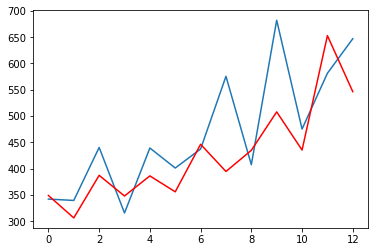

In [4]:
series = read_csv('/content/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()